<a href="https://colab.research.google.com/github/thearcanist/cloth-classification-using-keras/blob/master/Keras1(shallow_and_deep_testing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/Top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [101]:
train_images.shape

(60000, 28, 28)

In [102]:
len(train_labels)

60000

In [103]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

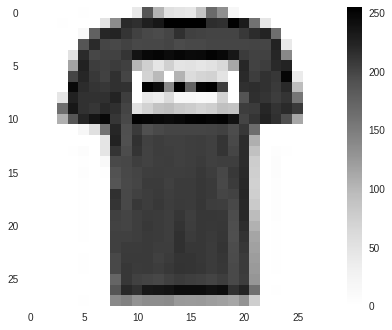

In [104]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

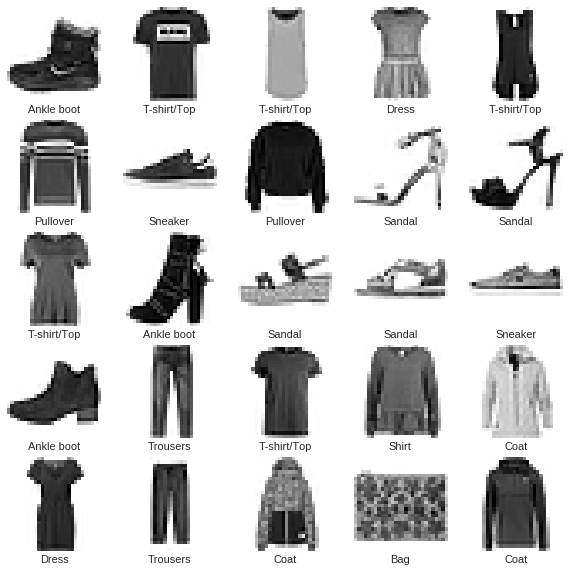

In [106]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
input_layer = keras.layers.Flatten(input_shape = (28, 28))
output_layer = keras.layers.Dense(10, activation = tf.nn.softmax)

In [0]:
#hidden_layer1 = keras.layers.Dense(400, activation = tf.nn.relu)
#hidden_layer2 = keras.layers.Dense(100, activation = tf.nn.relu)

#shallow_neural_net = keras.Sequential([input_layer, hidden_layer1, hidden_layer2, output_layer])

#shallow_neural_net.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
#shallow_neural_net.fit(train_images, train_labels, epochs = 5)

In [110]:
test_loss, test_acc = shallow_neural_net.evaluate(test_images, test_labels)
test_acc, test_loss

10000/10000 [==============================] - 1s 118us/step


(0.8575, 0.40016094450950623)

In [0]:
hidden_layer1 = keras.layers.Dense(400, activation = tf.nn.relu)
hidden_layer2 = keras.layers.Dense(400, activation = tf.nn.relu)
hidden_layer3 = keras.layers.Dense(400, activation = tf.nn.relu)
hidden_layer4 = keras.layers.Dense(400, activation = tf.nn.relu)
hidden_layer5 = keras.layers.Dense(100, activation = tf.nn.relu)
hidden_layer6 = keras.layers.Dense(100, activation = tf.nn.relu)

In [116]:
for layers in deep_neural_net.layers:
  print(layers)

In [0]:
deep_neural_net = keras.Sequential([input_layer, hidden_layer1, hidden_layer2,hidden_layer3,hidden_layer4, hidden_layer5, output_layer])

deep_neural_net.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [119]:
deep_neural_net.fit(train_images, train_labels, epochs = 7)

Epoch 1/7
60000/60000 [==============================] - 20s 327us/step - loss: 0.2903 - acc: 0.8938
Epoch 2/7
60000/60000 [==============================] - 18s 303us/step - loss: 0.2777 - acc: 0.8976
Epoch 3/7
60000/60000 [==============================] - 17s 280us/step - loss: 0.2654 - acc: 0.9020
Epoch 4/7
60000/60000 [==============================] - 16s 273us/step - loss: 0.2566 - acc: 0.9052
Epoch 5/7
60000/60000 [==============================] - 17s 275us/step - loss: 0.2455 - acc: 0.9078
Epoch 6/7
60000/60000 [==============================] - 16s 264us/step - loss: 0.2384 - acc: 0.9109
Epoch 7/7
60000/60000 [==============================] - 17s 281us/step - loss: 0.2292 - acc: 0.9147


In [120]:
test_loss, test_acc = deep_neural_net.evaluate(test_images, test_labels)
test_acc, test_loss

10000/10000 [==============================] - 1s 128us/step


(0.8859, 0.3335280426979065)

In [0]:
predictions = deep_neural_net.predict(test_images)

In [122]:
predictions[0]

array([1.3633617e-13, 7.5445354e-07, 1.5952257e-11, 1.1373492e-09,
       2.1596560e-09, 3.4297532e-03, 3.6725831e-10, 1.7527107e-02,
       8.0402884e-09, 9.7904235e-01], dtype=float32)

In [123]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap = plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100 * np.max(predictions_array), class_names[true_label]), color = color)
  
def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color = '#777777')
   plt.ylim([0, 1])
   predicted_label = np.argmax(predictions_array)
    
   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

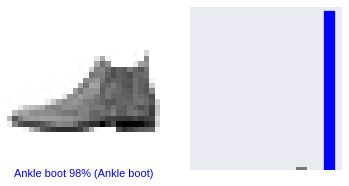

In [130]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

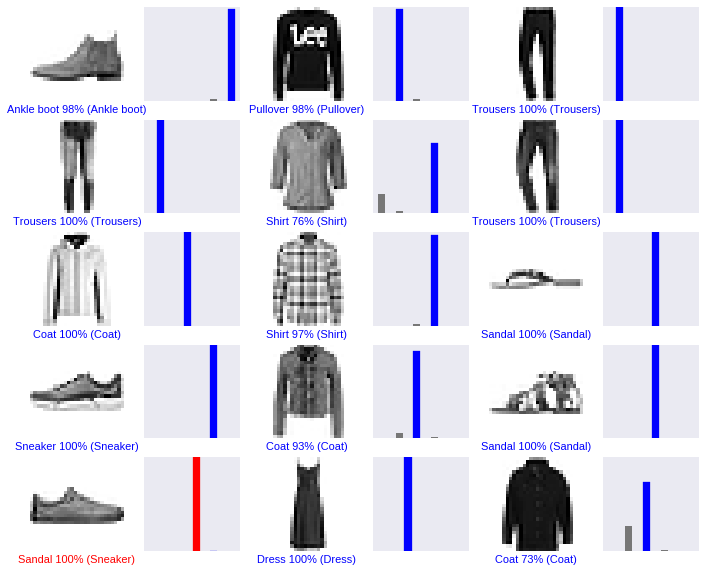

In [132]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i , predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i , predictions, test_labels)